# Importar librerias y cargar documentos

In [121]:
# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd
import numpy as np
import re

# Imputaci√≥n de nulos usando m√©todos avanzados estad√≠sticos
# -----------------------------------------------------------------------
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import KNNImputer

# Librer√≠as de visualizaci√≥n
# -----------------------------------------------------------------------
import seaborn as sns
import matplotlib.pyplot as plt

# Configuraci√≥n
# -----------------------------------------------------------------------
pd.set_option('display.max_columns', None) # para poder visualizar todas las columnas de los DataFrames
pd.set_option('display.max_rows', None) # ver todas las filas

In [122]:
# Cargar los datos
# -----------------------------------------------------------------------
df1 = pd.read_csv("Customer Flight Activity.csv")
df2 = pd.read_csv("Customer Loyalty History.csv")


# Exploraci√≥n de datos

Descripci√≥n de las columnas

```
Customer Flight Analysis.csv
Este archivo contiene informaci√≥n sobre la actividad de vuelo de los clientes, incluyendo el n√∫mero de
vuelos reservados, la distancia volada, puntos acumulados y redimidos, y costos asociados a los puntos
redimidos.

Loyalty Number: Este atributo representa un identificador √∫nico para cada cliente dentro del
programa de lealtad de la aerol√≠nea. Cada n√∫mero de lealtad corresponde a un cliente espec√≠fico.

Year: Indica el a√±o en el cual se registraron las actividades de vuelo para el cliente.

Month: Representa el mes del a√±o (de 1 a 12) en el cual ocurrieron las actividades de vuelo.

Flights Booked: N√∫mero total de vuelos reservados por el cliente en ese mes espec√≠fico.

Flights with Companions: N√∫mero de vuelos reservados en los cuales el cliente viaj√≥ con
acompa√±antes.

Total Flights: El n√∫mero total de vuelos que el cliente ha realizado, que puede incluir vuelos
reservados en meses anteriores.

Distance: La distancia total (presumiblemente en millas o kil√≥metros) que el cliente ha volado
durante el mes.

Points Accumulated: Puntos acumulados por el cliente en el programa de lealtad durante el mes,
con base en la distancia volada u otros factores.

Points Redeemed: Puntos que el cliente ha redimido en el mes, posiblemente para obtener
beneficios como vuelos gratis, mejoras, etc.

Dollar Cost Points Redeemed: El valor en d√≥lares de los puntos que el cliente ha redimido durante
el mes.

Customer Loyalty History.csv
Este archivo proporciona un perfil detallado de los clientes, incluyendo su ubicaci√≥n, nivel educativo,
ingresos, estado civil, y detalles sobre su membres√≠a en el programa de lealtad (como el tipo de tarjeta,
valor de vida del cliente, y fechas de inscripci√≥n y cancelaci√≥n).

Loyalty Number: Identificador √∫nico del cliente dentro del programa de lealtad. Este n√∫mero permite
correlacionar la informaci√≥n de este archivo con el archivo de actividad de vuelos.

Country: Pa√≠s de residencia del cliente.

Province: Provincia o estado de residencia del cliente (aplicable a pa√≠ses con divisiones provinciales
o estatales, como Canad√°).

City: Ciudad de residencia del cliente.

Postal Code: C√≥digo postal del cliente.

Gender: G√©nero del cliente (ej. Male para masculino y Female para femenino).

Education: Nivel educativo alcanzado por el cliente (ej. Bachelor para licenciatura, College para
estudios universitarios o t√©cnicos, etc.).

Salary: Ingreso anual estimado del cliente.

Marital Status: Estado civil del cliente (ej. Single para soltero, Married para casado, Divorced para
divorciado, etc.).

Loyalty Card: Tipo de tarjeta de lealtad que posee el cliente. Esto podr√≠a indicar distintos niveles o
categor√≠as dentro del programa de lealtad.

CLV (Customer Lifetime Value): Valor total estimado que el cliente aporta a la empresa durante
toda la relaci√≥n que mantiene con ella.

Enrollment Type: Tipo de inscripci√≥n del cliente en el programa de lealtad (ej. Standard).

Enrollment Year: A√±o en que el cliente se inscribi√≥ en el programa de lealtad.

Enrollment Month: Mes en que el cliente se inscribi√≥ en el programa de lealtad.

Cancellation Year: A√±o en que el cliente cancel√≥ su membres√≠a en el programa de lealtad, si aplica.

Cancellation Month: Mes en que el cliente cancel√≥ su membres√≠a en el programa de lealtad, si
aplica.
```


In [123]:
# Funcion para realizar un EDA B√°sico
def eda_basico(df):
    # üå∑ Mostrar ejemplos de datos para tener una primera idea
    print('üå∑ Ejemplo de datos del DF:')
    display(df.head(3))    # Primeras 3 filas
    display(df.tail(3))    # √öltimas 3 filas
    display(df.sample(3))  # 3 filas aleatorias
    print('‚îÄ' * 100)

    # üåª N√∫mero total de filas (observaciones)
    print('üåª N√∫mero de filas:')
    print(df.shape[0])
    print('‚îÄ' * 100)

    # üå± N√∫mero total de columnas (variables)
    print('üå± N√∫mero de columnas:')
    print(df.shape[1])
    print('‚îÄ' * 100)

    # üåº Informaci√≥n general del DataFrame (tipos, nulos, etc.)
    print('üåº Informaci√≥n de la tabla:')
    display(df.info())
    print('‚îÄ' * 100)

    # üåë Lista con los nombres de las columnas
    print('üåë Nombre de las columnas:')
    print(df.columns.tolist())
    print('‚îÄ' * 100)

    # üçÑ Estad√≠sticas descriptivas de columnas num√©ricas
    print('üçÑ Descripci√≥n de los datos num√©ricos:')
    display(df.describe().T)
    print('‚îÄ' * 100)

    # üåã Estad√≠sticas descriptivas de columnas categ√≥ricas (si existen)
    print('üåã Descripci√≥n de los datos no-num√©ricos:')
    if not df.select_dtypes(include='object').empty:
        display(df.describe(include='object').T)
    else:
        print('üì≠ No hay columnas tipo "object" en este DataFrame.')
    print('‚îÄ' * 100)

    # üçÇ Cu√°ntos valores √∫nicos hay en cada columna
    print('üçÇ N√∫mero de valores √∫nicos por columna:')
    display(df.nunique())
    print('‚îÄ' * 100)

    # üêñ Cu√°ntos valores nulos hay en cada columna
    print('üêñ Valores nulos por columna:')
    display(df.isnull().sum())
    print('‚îÄ' * 100)

    # üê≤ Revisi√≥n de filas duplicadas
    print('üê≤ Filas duplicadas:')
    duplicados = df.duplicated().sum()
    if duplicados > 0:
        print(f'üìõ Hay {duplicados} filas duplicadas.')
        display(df[df.duplicated()].head(3))
    else:
        print('‚úÖ No hay filas duplicadas.')
    print('‚îÄ' * 100)

    # ü™π Columnas constantes (con solo un valor √∫nico)
    print('ü™π Columnas constantes (solo un valor):')
    constantes = df.columns[df.nunique() <= 1]
    if not constantes.empty:
        print(f'üìå {len(constantes)} columnas con solo un valor:')
        display(constantes.tolist())
    else:
        print('‚úÖ No hay columnas constantes.')
    print('‚îÄ' * 100)

    # üöÄ Ver valores √∫nicos de columnas categ√≥ricas (si existen)
    print('üöÄ Valores √∫nicos en columnas categ√≥ricas:')
    cat_cols = df.select_dtypes(include='object')
    if not cat_cols.empty:
        for col in cat_cols.columns:
            print(f'üî∏ {col}')
            print(cat_cols[col].unique())
            print('‚îÄ' * 60)
    else:
        print('üì≠ No hay columnas categ√≥ricas.')
    print('‚îÄ' * 100)

    # üß¨ Resumen de tipos de datos presentes en el DataFrame
    print('üß¨ Tipos de datos por columna:')
    display(df.dtypes.value_counts())
    print('‚îÄ' * 100)


In [124]:
# EDA del primer DataFrame
eda_basico(df1)


üå∑ Ejemplo de datos del DF:


Loyalty Number  Year  Month  Flights Booked  Flights with Companions  \
0          100018  2017      1               3                        0   
1          100102  2017      1              10                        4   
2          100140  2017      1               6                        0   

   Total Flights  Distance  Points Accumulated  Points Redeemed  \
0              3      1521               152.0                0   
1             14      2030               203.0                0   
2              6      1200               120.0                0   

   Dollar Cost Points Redeemed  
0                            0  
1                            0  
2                            0

Loyalty Number  Year  Month  Flights Booked  Flights with Companions  \
405621          999940  2018     12               3                        0   
405622          999982  2018     12               0                        0   
405623          999986  2018     12               0                        0   

        Total Flights  Distance  Points Accumulated  Points Redeemed  \
405621              3      1233               123.0                0   
405622              0         0                 0.0                0   
405623              0         0                 0.0                0   

        Dollar Cost Points Redeemed  
405621                            0  
405622                            0  
405623                            0

Loyalty Number  Year  Month  Flights Booked  Flights with Companions  \
169728          478284  2018     11               0                        0   
151218          952545  2017      9               8                        1   
58684           526165  2017      4               7                        7   

        Total Flights  Distance  Points Accumulated  Points Redeemed  \
169728              0         0                 0.0                0   
151218              9      3681               368.0                0   
58684              14      1218               121.0                0   

        Dollar Cost Points Redeemed  
169728                            0  
151218                            0  
58684                             0

‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
üåª N√∫mero de filas:
405624
‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
üå± N√∫mero de columnas:
10
‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
üåº Informaci√≥n de la tabla:
<class 

None

‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
üåë Nombre de las columnas:
['Loyalty Number', 'Year', 'Month', 'Flights Booked', 'Flights with Companions', 'Total Flights', 'Distance', 'Points Accumulated', 'Points Redeemed', 'Dollar Cost Points Redeemed']
‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
üçÑ Descripci√≥n de los datos num√©ricos:


count           mean            std       min  \
Loyalty Number               405624.0  550037.873084  258935.286969  100018.0   
Year                         405624.0    2017.500000       0.500001    2017.0   
Month                        405624.0       6.500000       3.452057       1.0   
Flights Booked               405624.0       4.115052       5.225518       0.0   
Flights with Companions      405624.0       1.031805       2.076869       0.0   
Total Flights                405624.0       5.146858       6.521227       0.0   
Distance                     405624.0    1208.880059    1433.155320       0.0   
Points Accumulated           405624.0     123.692721     146.599831       0.0   
Points Redeemed              405624.0      30.696872     125.486049       0.0   
Dollar Cost Points Redeemed  405624.0       2.484503      10.150038       0.0   

                                   25%       50%        75%       max  
Loyalty Number               326961.00  550834.0  772194.00  999986.0  
Year                           2017.00    2017.5    2018.00    2018.0  
Month                             3.75       6.5       9.25      12.0  
Flights Booked                    0.00       1.0       8.00      21.0  
Flights with Companions           0.00       0.0       1.00      11.0  
Total Flights                     0.00       1.0      10.00      32.0  
Distance                          0.00     488.0    2336.00    6293.0  
Points Accumulated                0.00      50.0     239.00     676.5  
Points Redeemed                   0.00       0.0       0.00     876.0  
Dollar Cost Points Redeemed       0.00       0.0       0.00      71.0

‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
üåã Descripci√≥n de los datos no-num√©ricos:
üì≠ No hay columnas tipo "object" en este DataFrame.
‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
üçÇ N√∫mero de valores √∫nicos por columna:


Loyalty Number                 16737
Year                               2
Month                             12
Flights Booked                    22
Flights with Companions           12
Total Flights                     33
Distance                        4746
Points Accumulated              1549
Points Redeemed                  587
Dollar Cost Points Redeemed       49
dtype: int64

‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
üêñ Valores nulos por columna:


Loyalty Number                 0
Year                           0
Month                          0
Flights Booked                 0
Flights with Companions        0
Total Flights                  0
Distance                       0
Points Accumulated             0
Points Redeemed                0
Dollar Cost Points Redeemed    0
dtype: int64

‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
üê≤ Filas duplicadas:
üìõ Hay 1864 filas duplicadas.


Loyalty Number  Year  Month  Flights Booked  Flights with Companions  \
42           101902  2017      1               0                        0   
227          112142  2017      1               0                        0   
478          126100  2017      1               0                        0   

     Total Flights  Distance  Points Accumulated  Points Redeemed  \
42               0         0                 0.0                0   
227              0         0                 0.0                0   
478              0         0                 0.0                0   

     Dollar Cost Points Redeemed  
42                             0  
227                            0  
478                            0

‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
ü™π Columnas constantes (solo un valor):
‚úÖ No hay columnas constantes.
‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
üöÄ Valores √∫nicos en columnas categ√≥ricas:
üì≠ No hay columnas categ√≥ricas.
‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î

int64      9
float64    1
Name: count, dtype: int64

‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ


In [125]:
# EDA del segundo DataFrame
eda_basico(df2)

üå∑ Ejemplo de datos del DF:


Loyalty Number Country          Province       City Postal Code  Gender  \
0          480934  Canada           Ontario    Toronto     M2Z 4K1  Female   
1          549612  Canada           Alberta   Edmonton     T3G 6Y6    Male   
2          429460  Canada  British Columbia  Vancouver     V6E 3D9    Male   

  Education   Salary Marital Status Loyalty Card      CLV Enrollment Type  \
0  Bachelor  83236.0        Married         Star  3839.14        Standard   
1   College      NaN       Divorced         Star  3839.61        Standard   
2   College      NaN         Single         Star  3839.75        Standard   

   Enrollment Year  Enrollment Month  Cancellation Year  Cancellation Month  
0             2016                 2                NaN                 NaN  
1             2016                 3                NaN                 NaN  
2             2014                 7             2018.0                 1.0

Loyalty Number Country          Province        City Postal Code  \
16734          776187  Canada  British Columbia   Vancouver     V5R 1W3   
16735          906428  Canada             Yukon  Whitehorse     Y2K 6R0   
16736          652627  Canada          Manitoba    Winnipeg     R2C 0M5   

       Gender Education   Salary Marital Status Loyalty Card       CLV  \
16734    Male   College      NaN         Single         Star  74228.52   
16735    Male  Bachelor -57297.0        Married         Star  10018.66   
16736  Female  Bachelor  75049.0        Married         Star  83325.38   

      Enrollment Type  Enrollment Year  Enrollment Month  Cancellation Year  \
16734        Standard             2014                 3                NaN   
16735  2018 Promotion             2018                 4                NaN   
16736        Standard             2015                12             2016.0   

       Cancellation Month  
16734                 NaN  
16735                 NaN  
16736                 8.0

Loyalty Number Country      Province     City Postal Code  Gender  \
3472          738473  Canada  Saskatchewan   Regina     S1J 3C5  Female   
2872          494498  Canada       Ontario  Toronto     M2Z 4K1    Male   
4259          196583  Canada       Ontario  Toronto     P2T 6G3    Male   

     Education   Salary Marital Status Loyalty Card       CLV Enrollment Type  \
3472    Doctor  65018.0        Married       Aurora  13466.92        Standard   
2872  Bachelor  98353.0        Married       Aurora   9122.93        Standard   
4259  Bachelor  60366.0         Single         Nova   2779.85        Standard   

      Enrollment Year  Enrollment Month  Cancellation Year  Cancellation Month  
3472             2013                11             2018.0                 5.0  
2872             2014                 6                NaN                 NaN  
4259             2013                 1                NaN                 NaN

‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
üåª N√∫mero de filas:
16737
‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
üå± N√∫mero de columnas:
16
‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
üåº Informaci√≥n de la tabla:
<class '

None

‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
üåë Nombre de las columnas:
['Loyalty Number', 'Country', 'Province', 'City', 'Postal Code', 'Gender', 'Education', 'Salary', 'Marital Status', 'Loyalty Card', 'CLV', 'Enrollment Type', 'Enrollment Year', 'Enrollment Month', 'Cancellation Year', 'Cancellation Month']
‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
üçÑ Descripci√≥n de los datos num√©ricos:


count           mean            std        min  \
Loyalty Number      16737.0  549735.880445  258912.132453  100018.00   
Salary              12499.0   79245.609409   35008.297285  -58486.00   
CLV                 16737.0    7988.896536    6860.982280    1898.01   
Enrollment Year     16737.0    2015.253211       1.979111    2012.00   
Enrollment Month    16737.0       6.669116       3.398958       1.00   
Cancellation Year    2067.0    2016.503145       1.380743    2013.00   
Cancellation Month   2067.0       6.962748       3.455297       1.00   

                          25%        50%        75%        max  
Loyalty Number      326603.00  550434.00  772019.00  999986.00  
Salary               59246.50   73455.00   88517.50  407228.00  
CLV                   3980.84    5780.18    8940.58   83325.38  
Enrollment Year       2014.00    2015.00    2017.00    2018.00  
Enrollment Month         4.00       7.00      10.00      12.00  
Cancellation Year     2016.00    2017.00    2018.00    2018.00  
Cancellation Month       4.00       7.00      10.00      12.00

‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
üåã Descripci√≥n de los datos no-num√©ricos:


count unique       top   freq
Country          16737      1    Canada  16737
Province         16737     11   Ontario   5404
City             16737     29   Toronto   3351
Postal Code      16737     55   V6E 3D9    911
Gender           16737      2    Female   8410
Education        16737      5  Bachelor  10475
Marital Status   16737      3   Married   9735
Loyalty Card     16737      3      Star   7637
Enrollment Type  16737      2  Standard  15766

‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
üçÇ N√∫mero de valores √∫nicos por columna:


Loyalty Number        16737
Country                   1
Province                 11
City                     29
Postal Code              55
Gender                    2
Education                 5
Salary                 5890
Marital Status            3
Loyalty Card              3
CLV                    7984
Enrollment Type           2
Enrollment Year           7
Enrollment Month         12
Cancellation Year         6
Cancellation Month       12
dtype: int64

‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
üêñ Valores nulos por columna:


Loyalty Number            0
Country                   0
Province                  0
City                      0
Postal Code               0
Gender                    0
Education                 0
Salary                 4238
Marital Status            0
Loyalty Card              0
CLV                       0
Enrollment Type           0
Enrollment Year           0
Enrollment Month          0
Cancellation Year     14670
Cancellation Month    14670
dtype: int64

‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
üê≤ Filas duplicadas:
‚úÖ No hay filas duplicadas.
‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
ü™π Columnas constantes (solo un valor):
üìå 1 columnas con solo un valor:


['Country']

‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
üöÄ Valores √∫nicos en columnas categ√≥ricas:
üî∏ Country
['Canada']
‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
üî∏ Province
['Ontario' 'Alberta' 'British Columbia' 'Quebec' 'Yukon' 'New Brunswick'
 'Manitoba' 'Nova Scotia' 'Saskatchewan' 'Newfoundland'
 'Prince Edward Island']
‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
üî∏ City
['Toronto' 'Edmonton' 'Vancouver' 'Hull' 'Whitehorse' 'Trenton' 'Montreal'
 'Dawson Cree

object     9
float64    4
int64      3
Name: count, dtype: int64

‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ


In [126]:
# Uno los DF por la columna 'Loyalty Number'con un merge
df = pd.merge(df1, df2, on='Loyalty Number', how='left')


In [127]:
# Verifico que ha aumnetado el numero de columnas para ver si se han unido correctamente
print(df.shape)   
      

(405624, 25)


In [128]:
# EDA del DataFrame combinado
eda_basico(df)

üå∑ Ejemplo de datos del DF:


Loyalty Number  Year  Month  Flights Booked  Flights with Companions  \
0          100018  2017      1               3                        0   
1          100102  2017      1              10                        4   
2          100140  2017      1               6                        0   

   Total Flights  Distance  Points Accumulated  Points Redeemed  \
0              3      1521               152.0                0   
1             14      2030               203.0                0   
2              6      1200               120.0                0   

   Dollar Cost Points Redeemed Country          Province          City  \
0                            0  Canada           Alberta      Edmonton   
1                            0  Canada           Ontario       Toronto   
2                            0  Canada  British Columbia  Dawson Creek   

  Postal Code  Gender Education   Salary Marital Status Loyalty Card      CLV  \
0     T9G 1W3  Female  Bachelor  92552.0        Married       Aurora  7919.20   
1     M1R 4K3    Male   College      NaN         Single         Nova  2887.74   
2     U5I 4F1  Female   College      NaN       Divorced         Nova  2838.07   

  Enrollment Type  Enrollment Year  Enrollment Month  Cancellation Year  \
0        Standard             2016                 8                NaN   
1        Standard             2013                 3                NaN   
2        Standard             2016                 7                NaN   

   Cancellation Month  
0                 NaN  
1                 NaN  
2                 NaN

Loyalty Number  Year  Month  Flights Booked  Flights with Companions  \
405621          999940  2018     12               3                        0   
405622          999982  2018     12               0                        0   
405623          999986  2018     12               0                        0   

        Total Flights  Distance  Points Accumulated  Points Redeemed  \
405621              3      1233               123.0                0   
405622              0         0                 0.0                0   
405623              0         0                 0.0                0   

        Dollar Cost Points Redeemed Country          Province         City  \
405621                            0  Canada            Quebec  Quebec City   
405622                            0  Canada  British Columbia     Victoria   
405623                            0  Canada           Ontario       Ottawa   

       Postal Code  Gender Education   Salary Marital Status Loyalty Card  \
405621     G1B 3L5  Female  Bachelor  47670.0        Married         Nova   
405622     V10 6T5    Male   College      NaN        Married         Star   
405623     K1F 2R2  Female  Bachelor  46594.0        Married         Nova   

             CLV Enrollment Type  Enrollment Year  Enrollment Month  \
405621  20266.50        Standard             2017                 7   
405622   2631.56        Standard             2018                 7   
405623   8257.01  2018 Promotion             2018                 2   

        Cancellation Year  Cancellation Month  
405621                NaN                 NaN  
405622                NaN                 NaN  
405623                NaN                 NaN

Loyalty Number  Year  Month  Flights Booked  Flights with Companions  \
373390          184635  2018     11               0                        0   
321533          122283  2018      8               9                        4   
66720           952696  2017      4               0                        0   

        Total Flights  Distance  Points Accumulated  Points Redeemed  \
373390              0         0                 0.0                0   
321533             13      3562               356.0                0   
66720               0         0                 0.0                0   

        Dollar Cost Points Redeemed Country Province      City Postal Code  \
373390                            0  Canada  Ontario   Toronto     M1R 4K3   
321533                            0  Canada  Ontario   Toronto     M8Y 4K8   
66720                             0  Canada   Quebec  Montreal     H2T 9K8   

        Gender Education    Salary Marital Status Loyalty Card       CLV  \
373390  Female  Bachelor  104581.0         Single         Star   4574.52   
321533    Male  Bachelor   74727.0        Married       Aurora  10899.30   
66720   Female  Bachelor   99788.0        Married         Nova  20096.89   

       Enrollment Type  Enrollment Year  Enrollment Month  Cancellation Year  \
373390        Standard             2014                10                NaN   
321533        Standard             2015                 5                NaN   
66720         Standard             2017                12                NaN   

        Cancellation Month  
373390                 NaN  
321533                 NaN  
66720                  NaN

‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
üåª N√∫mero de filas:
405624
‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
üå± N√∫mero de columnas:
25
‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
üåº Informaci√≥n de la tabla:
<class 

None

‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
üåë Nombre de las columnas:
['Loyalty Number', 'Year', 'Month', 'Flights Booked', 'Flights with Companions', 'Total Flights', 'Distance', 'Points Accumulated', 'Points Redeemed', 'Dollar Cost Points Redeemed', 'Country', 'Province', 'City', 'Postal Code', 'Gender', 'Education', 'Salary', 'Marital Status', 'Loyalty Card', 'CLV', 'Enrollment Type', 'Enrollment Year', 'Enrollment Month', 'Cancellation Year', 'Cancellation Month']
‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ

count           mean            std  \
Loyalty Number               405624.0  550037.873084  258935.286969   
Year                         405624.0    2017.500000       0.500001   
Month                        405624.0       6.500000       3.452057   
Flights Booked               405624.0       4.115052       5.225518   
Flights with Companions      405624.0       1.031805       2.076869   
Total Flights                405624.0       5.146858       6.521227   
Distance                     405624.0    1208.880059    1433.155320   
Points Accumulated           405624.0     123.692721     146.599831   
Points Redeemed              405624.0      30.696872     125.486049   
Dollar Cost Points Redeemed  405624.0       2.484503      10.150038   
Salary                       302952.0   79268.825953   34992.133508   
CLV                          405624.0    7991.976226    6863.663857   
Enrollment Year              405624.0    2015.252529       1.979427   
Enrollment Month             405624.0       6.668008       3.399766   
Cancellation Year             50064.0    2016.499521       1.384336   
Cancellation Month            50064.0       6.966443       3.448300   

                                   min        25%        50%        75%  \
Loyalty Number               100018.00  326961.00  550834.00  772194.00   
Year                           2017.00    2017.00    2017.50    2018.00   
Month                             1.00       3.75       6.50       9.25   
Flights Booked                    0.00       0.00       1.00       8.00   
Flights with Companions           0.00       0.00       0.00       1.00   
Total Flights                     0.00       0.00       1.00      10.00   
Distance                          0.00       0.00     488.00    2336.00   
Points Accumulated                0.00       0.00      50.00     239.00   
Points Redeemed                   0.00       0.00       0.00       0.00   
Dollar Cost Points Redeemed       0.00       0.00       0.00       0.00   
Salary                       -58486.00   59262.00   73479.00   88612.00   
CLV                            1898.01    3985.32    5776.34    8936.82   
Enrollment Year                2012.00    2014.00    2015.00    2017.00   
Enrollment Month                  1.00       4.00       7.00      10.00   
Cancellation Year              2013.00    2016.00    2017.00    2018.00   
Cancellation Month                1.00       4.00       7.00      10.00   

                                   max  
Loyalty Number               999986.00  
Year                           2018.00  
Month                            12.00  
Flights Booked                   21.00  
Flights with Companions          11.00  
Total Flights                    32.00  
Distance                       6293.00  
Points Accumulated              676.50  
Points Redeemed                 876.00  
Dollar Cost Points Redeemed      71.00  
Salary                       407228.00  
CLV                           83325.38  
Enrollment Year                2018.00  
Enrollment Month                 12.00  
Cancellation Year              2018.00  
Cancellation Month               12.00

‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
üåã Descripci√≥n de los datos no-num√©ricos:


count unique       top    freq
Country          405624      1    Canada  405624
Province         405624     11   Ontario  130896
City             405624     29   Toronto   81096
Postal Code      405624     55   V6E 3D9   21984
Gender           405624      2    Female  203640
Education        405624      5  Bachelor  253752
Marital Status   405624      3   Married  235800
Loyalty Card     405624      3      Star  184224
Enrollment Type  405624      2  Standard  382200

‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
üçÇ N√∫mero de valores √∫nicos por columna:


Loyalty Number                 16737
Year                               2
Month                             12
Flights Booked                    22
Flights with Companions           12
Total Flights                     33
Distance                        4746
Points Accumulated              1549
Points Redeemed                  587
Dollar Cost Points Redeemed       49
Country                            1
Province                          11
City                              29
Postal Code                       55
Gender                             2
Education                          5
Salary                          5890
Marital Status                     3
Loyalty Card                       3
CLV                             7984
Enrollment Type                    2
Enrollment Year                    7
Enrollment Month                  12
Cancellation Year                  6
Cancellation Month                12
dtype: int64

‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
üêñ Valores nulos por columna:


Loyalty Number                      0
Year                                0
Month                               0
Flights Booked                      0
Flights with Companions             0
Total Flights                       0
Distance                            0
Points Accumulated                  0
Points Redeemed                     0
Dollar Cost Points Redeemed         0
Country                             0
Province                            0
City                                0
Postal Code                         0
Gender                              0
Education                           0
Salary                         102672
Marital Status                      0
Loyalty Card                        0
CLV                                 0
Enrollment Type                     0
Enrollment Year                     0
Enrollment Month                    0
Cancellation Year              355560
Cancellation Month             355560
dtype: int64

‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
üê≤ Filas duplicadas:
üìõ Hay 1864 filas duplicadas.


Loyalty Number  Year  Month  Flights Booked  Flights with Companions  \
42           101902  2017      1               0                        0   
227          112142  2017      1               0                        0   
478          126100  2017      1               0                        0   

     Total Flights  Distance  Points Accumulated  Points Redeemed  \
42               0         0                 0.0                0   
227              0         0                 0.0                0   
478              0         0                 0.0                0   

     Dollar Cost Points Redeemed Country       Province         City  \
42                             0  Canada        Ontario       London   
227                            0  Canada        Ontario  Thunder Bay   
478                            0  Canada  New Brunswick  Fredericton   

    Postal Code  Gender Education    Salary Marital Status Loyalty Card  \
42      M5B 3E4  Female   College       NaN        Married       Aurora   
227     K8T 5M5    Male  Bachelor   93073.0         Single       Aurora   
478     E3B 2H2  Female    Master  121261.0       Divorced         Nova   

          CLV Enrollment Type  Enrollment Year  Enrollment Month  \
42    6265.34        Standard             2017                 1   
227  16272.74        Standard             2015                 7   
478  17790.41        Standard             2013                11   

     Cancellation Year  Cancellation Month  
42                 NaN                 NaN  
227                NaN                 NaN  
478             2014.0                 7.0

‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
ü™π Columnas constantes (solo un valor):
üìå 1 columnas con solo un valor:


['Country']

‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
üöÄ Valores √∫nicos en columnas categ√≥ricas:
üî∏ Country
['Canada']
‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
üî∏ Province
['Alberta' 'Ontario' 'British Columbia' 'Saskatchewan' 'Quebec'
 'Newfoundland' 'Manitoba' 'New Brunswick' 'Nova Scotia'
 'Prince Edward Island' 'Yukon']
‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
üî∏ City
['Edmonton' 'Toronto' 'Dawson Creek' 'Vancouver' 'Regina' 'Montreal'
 'Sudbury' 'Quebec 

int64      11
object      9
float64     5
Name: count, dtype: int64

‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ


# Limpieza y transformaci√≥n de datos

Columnas con nulos
 - Salary (Num√©rica)
 - Cancellation Year (Num√©rica)
 - Cancellation Month (Numerica) 

Variable constante 
 - Country

Columnas duplicadas 

In [129]:
# Uso SimpleImputer para imputar valores nulos en la columna 'Salary'
# -----------------------------------------------------------------------

# Selecciono las columnas que quiero usar
columnas = ['Salary', 'Enrollment Year', 'CLV']
df_datos = df[columnas]

# Aplico SimpleImputer con la estrategia 'median'
imputer = SimpleImputer(strategy='median')
datos_imputados = imputer.fit_transform(df_datos)

mascara = df['Salary'].isna()

# Reemplazo los valores nulos en la columna 'Salary' con los datos imputados
df.loc[mascara, 'Salary'] = datos_imputados[mascara, 0]

In [130]:
# Opci√≥n KNNImputer para imputar los valores nulos de la columna 'Salary'

# Selecciono solo las columnas num√©ricas que considero
#columnas = ['Salary', 'Enrollment Year', 'CLV']
#imputer = KNNImputer(n_neighbors=3)

# Aplico KNN solo sobre esas columnas
#datos_imputados = imputer.fit_transform(df[columnas])

# Creo una m√°scara de los valores que originalmente estaban vac√≠os
#mascara = df['Salary'].isna()

# Relleno solo esos valores en el DataFrame original
#df.loc[mascara, 'Salary'] = datos_imputados[mascara, 0]


In [131]:
# Otras opcione para Salary

# Convierto todos los salarios negativos absoluto
#df['Salary'] = df['Salary'].abs()

# Decido hacer la media de Salario
#df['Salary'] = df['Salary'].fillna(df['Salary'].median())


In [132]:
# Relleno los valores nulos con 0 para conservar las parsonas que no se han dado de baja y creo una columna nueva para el an√°lisis
df['Cancellation Year'] = df['Cancellation Year'].fillna(0).astype(int)
df['Cancellation Month'] = df['Cancellation Month'].fillna(0).astype(int)


In [133]:
# Crep una columna booleana basada en si hay valor en 'Cancellation Year'

df['Canceled'] = df['Cancellation Year'] > 0 # Si el a√±o de cancelaci√≥n es mayor que 0, entonces s√≠ ha cancelado



In [134]:
# Convierto las columnas de mes a categoricas con los nombres del mes

# Diccionario para mapear n√∫meros de mes a nombres de mes
month_dict = {
    1: 'January', 2: 'February', 3: 'March', 4: 'April',
    5: 'May', 6: 'June', 7: 'July', 8: 'August',
    9: 'September', 10: 'October', 11: 'November', 12: 'December'
}

# Aplico el diccionario y convierto a tipo object
df['Enrollment Month'] = df['Enrollment Month'].map(month_dict)
df['Enrollment Month'] = df['Enrollment Month'].astype(str)


df['Cancellation Month'] = df['Cancellation Month'].map(month_dict)
df['Cancellation Month'] = df['Cancellation Month'].astype(str)

In [135]:
# Reemplazo los valores 'nan' (como texto) por 'No'
df['Cancellation Month'] = df['Cancellation Month'].replace('nan', 'No')

In [136]:
# Borro filas duplicadas
df = df.drop_duplicates()


In [137]:
# Borro la columna 'Country' ya que no aporta informaci√≥n relevante para el an√°lisis
df = df.drop(columns='Country').reset_index(drop=True)
#

# Visualizaci√≥n de datos

1.¬øC√≥mo se distribuye la cantidad de vuelos reservados por mes durante el a√±o?

2.¬øExiste una relaci√≥n entre la distancia de los vuelos y los puntos acumulados por los cliente?

3.¬øCu√°l es la distribuci√≥n de los clientes por provincia o estado?

4.¬øC√≥mo se compara el salario promedio entre los diferentes niveles educativos de los clientes?

5.¬øCu√°l es la proporci√≥n de clientes con diferentes tipos de tarjetas de fidelidad?

6.¬øC√≥mo se distribuyen los clientes seg√∫n su estado civil y g√©nero?

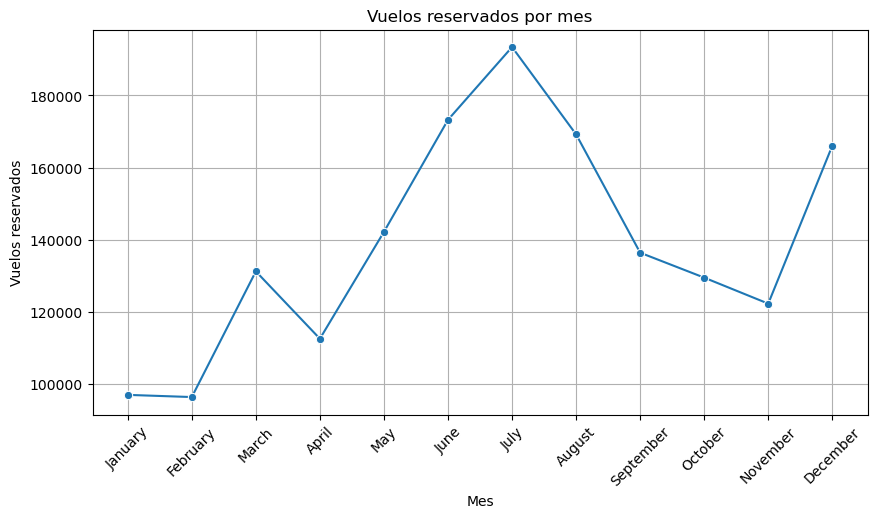

In [138]:
# 1.Distribuci√≥n de vuelos reservados por mes durante el a√±o
# -----------------------------------------------------------------------

# Orden de los meses para que aparezcan bien en el gr√°fico
meses_ordenados = ['January', 'February', 'March', 'April', 'May', 'June',
                   'July', 'August', 'September', 'October', 'November', 'December']
# Agrupar por mes y sumar los vuelos reservados
vuelos_mes = df.groupby('Month')['Flights Booked'].sum().reset_index()

# Gr√°fico de l√≠nea
plt.figure(figsize=(10, 5))
sns.lineplot(data=vuelos_mes, x= meses_ordenados, y='Flights Booked', marker='o')
plt.title('Vuelos reservados por mes')
plt.xlabel('Mes')
plt.ylabel('Vuelos reservados')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


#### Conclusiones:

- La distribuci√≥n de vuelos reservados por mes muestra una clara estacionalidad. 
- El n√∫mero de reservas comienza a aumentar a partir de marzo, alcanzando su punto m√°ximo en julio. 
- Luego disminuye progresivamente hasta noviembre, con un ligero repunte en diciembre. 
- Esto sugiere que los clientes reservan m√°s vuelos en los meses de verano, posiblemente por vacaciones, y menos en oto√±o.


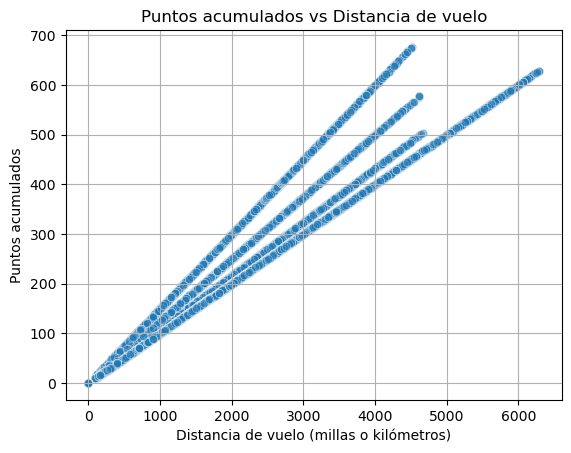

In [139]:
# 2.Relaci√≥n entre puntos acumulados por distancia de vuelo

sns.scatterplot(data=df, x='Distance', y='Points Accumulated', alpha=0.5)
plt.title('Puntos acumulados vs Distancia de vuelo')
plt.xlabel('Distancia de vuelo (millas o kil√≥metros)')
plt.ylabel('Puntos acumulados')
plt.grid(True)
plt.show()


#### Conclusiones:
- La gr√°fica muestra una clara relaci√≥n lineal positiva entre la distancia de vuelo y los puntos acumulados, lo que indica que, en general, cuanto m√°s larga es la distancia recorrida, m√°s puntos se obtienen. 
- Sin embargo, no todos los puntos siguen una √∫nica l√≠nea: se observan varias agrupaciones con pendientes distintas. 
- Esto sugiere que puede haber diferentes reglas de acumulaci√≥n de puntos, posiblemente relacionadas con el tipo de billete, la clase de servicio o el nivel del programa de fidelizaci√≥n del cliente. 
- Por lo tanto, aunque la tendencia general es clara, el sistema de puntos parece variar seg√∫n otros factores..



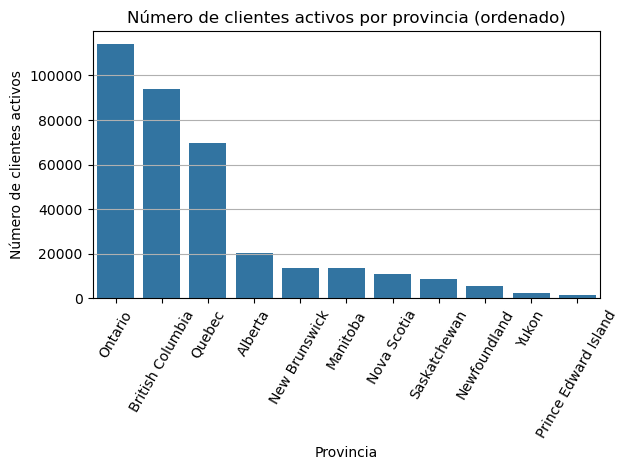

In [140]:
# 3.An√°lisis de clientes activos por provincia
# Filtro el DataFrame para excluir a los clientes que han cancelado
df_activos = df[df['Canceled'] == False]

# Agrupo por provincia y cuento los clientes activos
clientes_por_provincia = df_activos['Province'].value_counts().reset_index()
clientes_por_provincia.columns = ['Province', 'Loyalty Number']

# Ordeno de mayor a menor
clientes_por_provincia = clientes_por_provincia.sort_values(by='Loyalty Number', ascending=False)

# Creo el gr√°fico
sns.barplot(data=clientes_por_provincia, x='Province', y='Loyalty Number')
plt.title('N√∫mero de clientes activos por provincia (ordenado)')
plt.xlabel('Provincia')
plt.ylabel('N√∫mero de clientes activos')
plt.xticks(rotation=60)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


#### Conclusiones:

- Ontario es, con diferencia, la provincia con m√°s clientes activos, seguida por British Columbia y Quebec.
- Existe una gran diferencia en el n√∫mero de clientes entre las primeras tres provincias y el resto.
- Provincias menos pobladas como Yukon y Prince Edward Island tienen una cantidad m√≠nima de clientes activos.
- Esto sugiere una posible relaci√≥n entre la poblaci√≥n general de la provincia y el n√∫mero de clientes.
- La presencia del servicio o la campa√±a de captaci√≥n de clientes parece estar m√°s consolidada en las provincias grandes.



C:\Users\usuari\AppData\Local\Temp\ipykernel_6916\1527328199.py:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df_salario_por_educacion, x='Salary', y='Education', ci=None, color='#2f7a9f')


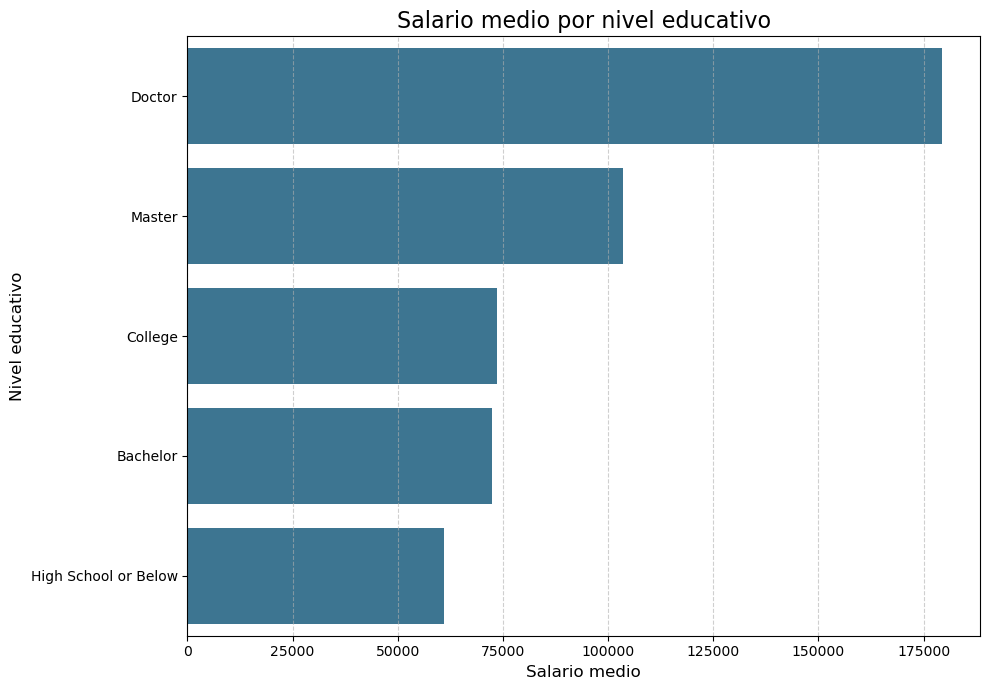

In [141]:
# 4.Salario promedio por nivel educativo
# -----------------------------------------------------------------------

df_activos = df[df['Canceled'] == False]
df_salario_por_educacion = df_activos.groupby('Education')['Salary'].mean().reset_index()
df_salario_por_educacion = df_salario_por_educacion.sort_values(by='Salary', ascending=False)

plt.figure(figsize=(10, 7)) 

sns.barplot(data=df_salario_por_educacion, x='Salary', y='Education', ci=None, color='#2f7a9f')

plt.title('Salario medio por nivel educativo', fontsize=16)
plt.xlabel('Salario medio', fontsize=12)
plt.ylabel('Nivel educativo', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.6) 
plt.tight_layout() 
plt.show()

#### Conclusiones:

- Existe una relaci√≥n positiva entre el nivel educativo alcanzado y el salario medio.
- Las personas con un doctorado obtienen, en promedio, el salario m√°s alto con una diferencia clara respecto al resto.
- Quienes tienen un m√°ster tambi√©n ganan significativamente m√°s que los niveles inferiores.
- Los niveles educativos intermedios como College y Bachelor presentan salarios muy similares.
- Las personas con solo educaci√≥n secundaria o inferior tienen el salario medio m√°s bajo.
- En general, invertir en educaci√≥n superior parece estar asociado con mejores ingresos.


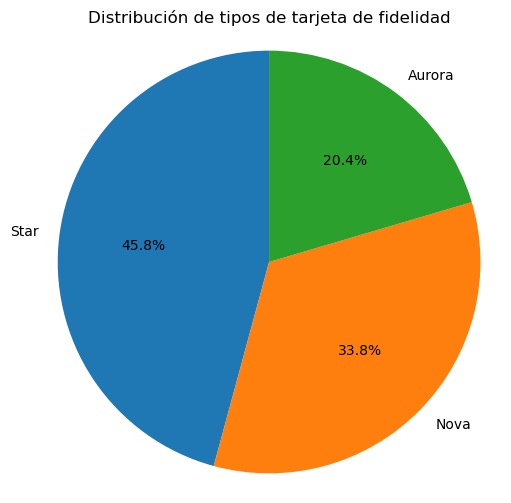

In [142]:
# 5.Proporci√≥n de los distintos tipos de tarjeta de fidelidad de los clientes
# -----------------------------------------------------------------------

df_activos = df[df['Canceled'] == False]

# Contar los tipos de tarjeta entre los clientes activos
conteo_tarjetas = df_activos['Loyalty Card'].value_counts()

# Gr√°fico de pastel
plt.figure(figsize=(6, 6))
plt.pie(conteo_tarjetas, labels=conteo_tarjetas.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribuci√≥n de tipos de tarjeta de fidelidad')
plt.axis('equal')  # Hace que el pastel sea redondo
plt.show()


#### Conclusiones:
- La tarjeta de fidelidad m√°s com√∫n es la Star, con casi la mitad de los clientes (45.5%).
- Le sigue la tarjeta Nova, que representa aproximadamente un tercio de los clientes (33.9%).
- La tarjeta Aurora es la menos utilizada, con poco m√°s del 20% de participaci√≥n.
- Esto sugiere que la mayor√≠a de los clientes se concentran en dos tipos de tarjeta (Star y Nova).
- Ser√≠a interesante investigar si las ventajas o beneficios ofrecidos por Star y Nova son m√°s atractivos, o si hay campa√±as que influyen en su mayor uso.


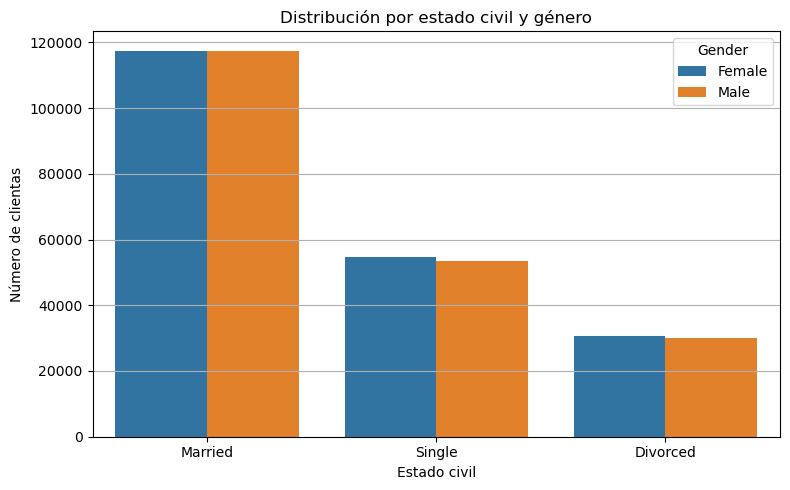

In [143]:
# 6.Distribuci√≥n por g√©nero y estado civil
# -----------------------------------------------------------------------
# Gr√°fico 
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='Marital Status', hue='Gender')

# T√≠tulos y etiquetas
plt.title('Distribuci√≥n por estado civil y g√©nero')
plt.xlabel('Estado civil')
plt.ylabel('N√∫mero de clientas')
plt.grid(axis='y')
plt.tight_layout()
plt.show()


#### Conclusiones:
- La mayor√≠a de los clientes est√°n casados, tanto hombres como mujeres, con cifras pr√°cticamente iguales.
- El segundo grupo m√°s numeroso es el de personas solteras, tambi√©n con cantidades muy similares entre g√©neros.
- Las personas divorciadas representan el grupo m√°s peque√±o, sin grandes diferencias entre hombres y mujeres.
- En general, la variable g√©nero no parece marcar diferencias significativas en la distribuci√≥n del estado civil.
- Esto sugiere que, al menos en este conjunto de datos, el estado civil est√° equilibrado por g√©nero.
